### Imports

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
from nltk.tokenize import RegexpTokenizer

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.ensemble import RandomForestClassifier





%matplotlib inline

pd.set_option("display.precision", 20)

np.set_printoptions(suppress=True)

### Loading Data

In [2]:
control_df = pd.read_csv('tweets_2016')

In [3]:
l = ['tweet_text', 'tweet_id']

control_df =  control_df[l]

In [4]:
control_df['target'] = 0

In [5]:
control_df= control_df[control_df.tweet_text != 'None']

In [6]:
control_df

,tweet_text,tweet_id,target
0,RT @ReaganBattalion: Obama hates @marcorubio b...,7.892854e+17,0
2,RT @lopezdoriga: EN DIRECTO en #Periscope: La ...,7.893299e+17,0
3,RT @wikileaks: There is no US election. There ...,7.893246e+17,0
7,RT @AJemaineClement: The lamest part of Trump'...,7.892696e+17,0
14,@realDonaldTrump #AlSmithDinner #TrumpTapes #H...,7.893517e+17,0
...,...,...,...
73211,RT @LifeSite: The next ‘deplorables’? Clinton ...,7.892677e+17,0
73212,Speaking is not his thing. He isn't intellectu...,7.892680e+17,0
73220,#Bestseller #greatreads #goodbooks #BookBoost...,7.893777e+17,0
73226,RT @activist360: The #AlSmithDinner was no dif...,7.893312e+17,0


In [7]:
targetdf =  pd.read_csv('hydrated_tweets')

In [8]:
targetdf = targetdf[l]

In [9]:
targetdf['target'] = 1

In [10]:
targetdf= targetdf[targetdf.tweet_text != 'None']

In [11]:
targetdf

,tweet_text,tweet_id,target
0,I'm not saying I believe there was widespread ...,1329817517590786054,1
1,Yes of course! https://t.co/YqpjvH0NoS,1330873630515896321,1
2,@RepPaulMitchell @realDonaldTrump Are you real...,1333262884357419010,1
3,Unity! https://t.co/I625kseVMn,1331653544579981314,1
4,Listen to this https://t.co/uhKFLA3GVz,1329835459200114688,1
...,...,...,...
67506,@ACTBrigitte Count my family and friends. This...,1331497791944843266,1
67508,@JudiciaryGOP @GOPChairwoman @GOP @GOPLeader @...,1327465594090754048,1
67510,OMG https://t.co/QFx2mxyRmj,1331580447495696385,1
67513,#election2020 #election2020results #electionre...,1325128552426057734,1


In [12]:
alldf = control_df.append(targetdf)

In [13]:
alldf.dropna(inplace=True)

In [14]:
alldf.set_index('tweet_id' , inplace=True)

In [50]:
alldf

,tweet_text,target
tweet_id,,
7.892854e+17,RT @ReaganBattalion: Obama hates @marcorubio b...,0
7.893299e+17,RT @lopezdoriga: EN DIRECTO en #Periscope: La ...,0
7.893246e+17,RT @wikileaks: There is no US election. There ...,0
7.892696e+17,RT @AJemaineClement: The lamest part of Trump'...,0
7.893517e+17,@realDonaldTrump #AlSmithDinner #TrumpTapes #H...,0
...,...,...
1.331498e+18,@ACTBrigitte Count my family and friends. This...,1
1.327466e+18,@JudiciaryGOP @GOPChairwoman @GOP @GOPLeader @...,1
1.331580e+18,OMG https://t.co/QFx2mxyRmj,1


### Train Test Split 

In [15]:
X= alldf.tweet_text
y = alldf.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
nltk_sw = stopwords.words('english')
politcal_stop = ['trump']

In [17]:
#This creates a dictionary for the reportcrossval function to drop results into
cv_dict = {}

def reportcrossval(model, model_name, X, Y):
    # This function takes in a model, test data for both X and Y
    # It then adds the mean of the crossval scores to a dictionary called cv_dict
    # and prints the results out.
    
    cv_mean = cross_val_score(model, X, Y).mean()
    cv_dict[model_name] = cv_mean
    print(f"The cv mean of {model_name} is {cv_mean}")


In [18]:
pipe_dummy = Pipeline([('dummy', DummyClassifier(strategy='most_frequent'))], verbose=True)

In [19]:
pipe_cv_mnnb = Pipeline(steps=[('cv', CountVectorizer()),
                               ('mnnb', MultinomialNB())],
                        verbose=True)

In [20]:
reportcrossval(pipe_dummy, 'Dummy', X_train, y_train)

[Pipeline] ............. (step 1 of 1) Processing dummy, total=   0.0s
[Pipeline] ............. (step 1 of 1) Processing dummy, total=   0.0s
[Pipeline] ............. (step 1 of 1) Processing dummy, total=   0.0s
[Pipeline] ............. (step 1 of 1) Processing dummy, total=   0.0s
[Pipeline] ............. (step 1 of 1) Processing dummy, total=   0.0s
The cv mean of Dummy is 0.5620654509624294


In [21]:
reportcrossval(pipe_cv_mnnb, 'Default CV and MNNB', X_train, y_train)

[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
The cv mean of Default CV and MNNB is 0.9840377061709423


Notes on this model:

This is pretty good for a first simple model. So much so that I wanted to take a closer look at the output in order to guide my iterative model building process.

In [22]:
pipe_cv_mnnb.fit(X_train, y_train)

[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.3s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s


Pipeline(steps=[('cv', CountVectorizer()), ('mnnb', MultinomialNB())],
         verbose=True)

#### Iteration one:

For this stage I've decided to stick with CountVectorizor and try a few parameters. 

In [65]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

basiclemmer = LemmaTokenizer()

In [66]:
param_grid1 = {'cv__ngram_range': [(1, 1), (1, 2), (1, 3)],
               'cv__stop_words': [None, nltk_sw, politcal_stop],
               'cv__tokenizer' : [None, basiclemmer]}

In [69]:
#grid1 = GridSearchCV(pipe_cv_mnnb, param_grid1, verbose=1, n_jobs = 4)

In [70]:
grid1.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.9s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:   37.7s finished


[Pipeline] ................ (step 1 of 2) Processing cv, total=   4.6s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s


GridSearchCV(estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('mnnb', MultinomialNB())],
                                verbose=True),
             n_jobs=4,
             param_grid={'cv__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cv__stop_words': [None,
                                            ['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                            ['trump']],
 

In [71]:
display(grid1.best_estimator_)
display(grid1.best_score_)
display(grid1.best_params_)

Pipeline(steps=[('cv', CountVectorizer(ngram_range=(1, 3))),
                ('mnnb', MultinomialNB())],
         verbose=True)

0.9876233267387254

{'cv__ngram_range': (1, 3), 'cv__stop_words': None, 'cv__tokenizer': None}

In [95]:
bestfromgrid1 = Pipeline(steps=[('cv', CountVectorizer(ngram_range =(1, 3))),
                               ('mnnb', MultinomialNB())],
                        verbose=True)

In [97]:
bestfromgrid1.fit(X_train, y_train)

[Pipeline] ................ (step 1 of 2) Processing cv, total=   4.6s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s


Pipeline(steps=[('cv', CountVectorizer(ngram_range=(1, 3))),
                ('mnnb', MultinomialNB())],
         verbose=True)

In [ ]:
 reportcrossval(bestofgrid1, 'Best CountVectorizer', X_train, y_train)

The best model here is all default settings except for: 

Although we see a bump up in accuracy with 1-3 n-grams, the other adjustements seem not to be helping. Let's try a different sorting method. 

#### Random Forest

A random forest classifier  

In [74]:
pipe_cv_rf = Pipeline(steps=[('cv', CountVectorizer()), 
                            ('rf', RandomForestClassifier(random_state=42))],
                            verbose=True)

In [76]:
param_grid2 = {'cv__ngram_range': [(1, 1), (1, 2), (1, 3)],
               'cv__stop_words': [None, nltk_sw],
               'rf__n_estimators': [100,200,500]
               }

In [77]:
grid2 = GridSearchCV(pipe_cv_rf, param_grid2, verbose=1, n_jobs = 4)

In [78]:
#grid2.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  8.8min
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed: 30.9min finished


[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.4s
[Pipeline] ................ (step 2 of 2) Processing rf, total= 1.4min


GridSearchCV(estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))],
                                verbose=True),
             n_jobs=4,
             param_grid={'cv__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cv__stop_words': [None,
                                            ['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', .

In [94]:
display(grid2.best_estimator_)
display(grid2.best_score_)
display(grid2.best_params_)

Pipeline(steps=[('cv',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('rf',
                 RandomForestClassifier(n_estimators=500, random_state=42))],
         verbose=True)

0.9937752873500962

{'cv__ngram_range': (1, 1),
 'cv__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',
  'off',
  'o

In [92]:
bestofgrid2 = Pipeline(steps=[('cv', CountVectorizer(stop_words = nltk_sw)), 
                            ('rf', RandomForestClassifier(n_estimators = 500, random_state=42))],
                            verbose=True)
bestofgrid2.fit(X_train, y_train)

[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.3s
[Pipeline] ................ (step 2 of 2) Processing rf, total= 1.4min


Pipeline(steps=[('cv',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('rf',
                 RandomForestClassifier(n_estimators=500, random_state=42))],
         verbose=True)

In [96]:
 reportcrossval(bestofgrid2, 'Best RandomForestClassifier', X_train, y_train)

[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] ................ (step 2 of 2) Processing rf, total= 1.0min
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] ................ (step 2 of 2) Processing rf, total=  59.7s
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] ................ (step 2 of 2) Processing rf, total= 1.0min
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] ................ (step 2 of 2) Processing rf, total= 1.0min
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] ................ (step 2 of 2) Processing rf, total= 1.0min
The cv mean of Best RandomForestClassifier is 0.9937752873500962


In [98]:
i = bestofgrid2.score(X_test, y_test)
print(i)

0.9942120781915474


#### TF-IDF

TF-IDF is an alternate way to vectorize text data. Rather than simply counting the number of times a word appears in a document, it compares how often a word appears in a document in relation to how often that word appears in the whole dataset. That is, a word that appears many times in a document but also many times in the corpus as a whole will be given less importance than a word that appears many times in that document but rarely appears in the overall corpus. Below, we paired this vectorizer with the MNNB model we've used before.

In [79]:
pipe_tfidf_mnnb = Pipeline(steps=[('tfidf', TfidfVectorizer()), 
                                  ('mnnb', MultinomialNB())],
                                  verbose=True)

In [82]:
param_grid3 = {'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
                'tfidf__stop_words': [None, nltk_sw, politcal_stop]}

In [83]:
grid3 = GridSearchCV(pipe_tfidf_mnnb, param_grid3, verbose=1, n_jobs = 4)

In [84]:
#grid3.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   42.2s finished


[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   2.8s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s


GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('mnnb', MultinomialNB())],
                                verbose=True),
             n_jobs=4,
             param_grid={'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'tfidf__stop_words': [None,
                                               ['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                                                'yourselves', 'he', 'him',
                                                'his', 'himself', 'she',
                                                "she's", 'her', 'hers',
                                                'herself', 'it', "it's",

In [85]:
display(grid3.best_estimator_)
display(grid3.best_score_)
display(grid3.best_params_)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('mnnb', MultinomialNB())],
         verbose=True)

0.9816169778674328

{'tfidf__ngram_range': (1, 2),
 'tfidf__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',
  'off'

In [90]:
bestofgrid3 = Pipeline([('tfidf', TfidfVectorizer(ngram_range =(1,2),stop_words = nltk_sw)), 
                    ('mnnb', MultinomialNB())],
                   verbose=True)
bestofgrid3.fit(X_train, y_train)

[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   2.7s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('mnnb', MultinomialNB())],
         verbose=True)

In [91]:
 reportcrossval(bestofgrid3, 'Best TFIDF', X_train, y_train)

[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   2.1s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   2.1s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   2.1s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   2.1s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   2.1s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
The cv mean of Best TFIDF is 0.9816169778674328


#### Analysing the errors


In [100]:
y_pred = bestfromgrid1.predict(X_test)

In [101]:
cm = confusion_matrix(y_test, y_pred)

In [102]:
cmd = ConfusionMatrixDisplay(cm, display_labels =['Not Misinformation', 'Misinformation'] )

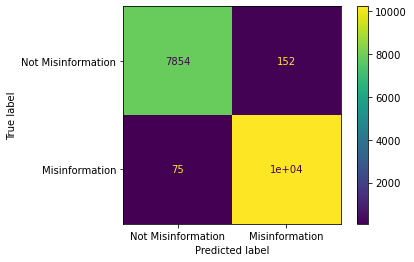

In [131]:
cmd.plot();

In [223]:
roc_auc_score(y_test, y_pred)

0.9868691685543176

In [171]:
results_df = pd.DataFrame(y_test)



In [172]:
results_df

,target
tweet_id,
789335093949050880.0,0
789331811981664256.0,0
1329829814249922560.0,1
789286228856274944.0,0
1324622713193865216.0,1
...,...
789263931260882944.0,0
789407616946479104.0,0
1325414016324259840.0,1


In [173]:
results_df['tweet_text'] = X_test

In [174]:
results_df

,target,tweet_text
tweet_id,,
789335093949050880.0,0,US-Wahl kompakt: Trump wird bei Benefiz-Dinner...
789331811981664256.0,0,RT @ObamaMalik: Trump family loves all people ...
1329829814249922560.0,1,@Timodc @BillKristol @Nate_Cohn @RVAT2020 I’m ...
789286228856274944.0,0,How Trump Will Create More ‘Bad Hombres’: The ...
1324622713193865216.0,1,"While evidence of VOTER FRAUD is coming in, th..."
...,...,...
789263931260882944.0,0,RT @sageboggs: I miss the window in this elect...
789407616946479104.0,0,"RT @QuentinKidd: Women, NOVA, coll educ whites..."
1325414016324259840.0,1,That Time When Joe Biden Bragged About Voter F...


In [175]:
y_pred_proba = bestfromgrid1.predict_proba(X_test)


In [176]:
y_pred_proba = pd.DataFrame(data = y_pred_proba, columns = ['pred0','pred1'])
y_pred_proba['pred0'].values

array([1., 1., 0., ..., 0., 1., 1.])

In [177]:
results_df.insert(loc = 2, column = 'pred0' , value = y_pred_proba['pred0'].values)
results_df.insert(loc = 3, column = 'pred1' , value = y_pred_proba['pred1'].values)
results_df.insert(loc = 4, column = 'pred' , value = y_pred.values)

In [178]:
results_df

,target,tweet_text,pred0,pred1,pred
tweet_id,,,,,
789335093949050880.0,0,US-Wahl kompakt: Trump wird bei Benefiz-Dinner...,1.00000000000000000000e+00,1.23422569226399562225e-14,0
789331811981664256.0,0,RT @ObamaMalik: Trump family loves all people ...,1.00000000000000000000e+00,1.82132828108059110733e-47,0
1329829814249922560.0,1,@Timodc @BillKristol @Nate_Cohn @RVAT2020 I’m ...,1.55145822407455187937e-204,1.00000000000000000000e+00,1
789286228856274944.0,0,How Trump Will Create More ‘Bad Hombres’: The ...,9.99999999986755483405e-01,1.32377405362839887649e-11,0
1324622713193865216.0,1,"While evidence of VOTER FRAUD is coming in, th...",4.47245925006609331101e-126,1.00000000000000000000e+00,1
...,...,...,...,...,...
789263931260882944.0,0,RT @sageboggs: I miss the window in this elect...,1.00000000000000000000e+00,1.20102722266312210397e-55,0
789407616946479104.0,0,"RT @QuentinKidd: Women, NOVA, coll educ whites...",1.00000000000000000000e+00,1.04235164051533142933e-25,0
1325414016324259840.0,1,That Time When Joe Biden Bragged About Voter F...,2.22694349548039555731e-49,1.00000000000000000000e+00,1


In [180]:
errors_df = results_df[results_df['target'] != results_df['pred']]  

In [181]:
errors_df

,target,tweet_text,pred0,pred1,pred
tweet_id,,,,,
789288703688642560.0,0,. https://t.co/V0eKM7zWNw,0.39830730866328240003,0.60169269133671843264,1
789402586981904384.0,0,@TylerPreston20 https://t.co/dGCIXnIhah,0.39830730866328240003,0.60169269133671843264,1
1329464227724210176.0,1,#Truth https://t.co/SZgFbPbjW2,0.95192177279264833523,0.04807822720734933331,0
1332402029571026944.0,1,@TherapyWestside @KamalaHarris @Official_tyler...,0.99999964134355712186,0.00000035865649504136,0
789361634556776448.0,0,@BonnieLustsYou the insanity going on. I'm hor...,0.25827345285167840894,0.74172654714832875200,1
...,...,...,...,...,...
789312001805848576.0,0,Rigged? https://t.co/QgjyFNlUOf,0.27181145444423265856,0.72818854555576728593,1
789304118292557824.0,0,https://t.co/nZV5cct97i,0.39830730866328240003,0.60169269133671843264,1
1329184443022512128.0,1,"@Squirrels_Mama Floyd County, GA Why in the wo...",0.99999992558236094897,0.00000007441766031495,0


In [182]:
false_neg_df = errors_df[errors_df['target'] == 1]
false_neg_df

,target,tweet_text,pred0,pred1,pred
tweet_id,,,,,
1329464227724210176.0,1,#Truth https://t.co/SZgFbPbjW2,0.95192177279264833523,4.80782272073493333053e-02,0
1332402029571026944.0,1,@TherapyWestside @KamalaHarris @Official_tyler...,0.99999964134355712186,3.58656495041359455364e-07,0
1325831415200669696.0,1,"Right on, my brother. We were warned way in ad...",1.00000000000000000000,2.02300991887967407291e-41,0
1331452446082646016.0,1,Please Release the KRAKEN Already!!! https://t...,0.84991229895819730977,1.50087701041809684632e-01,0
1330631238495956992.0,1,Rt https://t.co/jqsyAP78M0,0.99991576931095116354,8.42306890476770143278e-05,0
...,...,...,...,...,...
1324143228363415552.0,1,Here's an interesting take. Didn't think about...,0.99999955394683581744,4.46053184018505350188e-07,0
1329541189478064128.0,1,There should be an independent forensic ballot...,0.96189330363838032589,3.81066963616457365926e-02,0
1324601076352385024.0,1,.@realDonaldTrump @FLOTUS @VP @EricTrump @Ivan...,0.99999998171529136393,1.82847059656475169239e-08,0


In [195]:
false_neg_df.sort_values(by = 'pred1', inplace = True)

false_neg_df

<ipython-input-195-11fab79e3136>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_neg_df.sort_values(by = 'pred1', inplace = True)


,target,tweet_text,pred0,pred1,pred
tweet_id,,,,,
1325831415200669696.0,1,"Right on, my brother. We were warned way in ad...",1.00000000000000000000,2.02300991887967407291e-41,0
1333178921517338624.0,1,Lame steam media cares more about the flavor o...,1.00000000000000000000,9.98018622390543646948e-17,0
1325344582327005184.0,1,No way! Media control very real! We want to he...,1.00000000000000000000,4.21375156696182765331e-15,0
1325908821252960256.0,1,@SebGorka @AndrewCMcCarthy I have heard (you) ...,1.00000000000000000000,6.96132921902966795324e-15,0
1324604103750799360.0,1,I have no evidence for fraud. But that's not m...,0.99999999999965893949,3.78670216745135193458e-13,0
...,...,...,...,...,...
1326967884262752256.0,1,"@seanhannity We ""THE PEOPLE"" MUST FIND THE TRU...",0.91420184921999447791,8.57981507799962933580e-02,0
1331452446082646016.0,1,Please Release the KRAKEN Already!!! https://t...,0.84991229895819730977,1.50087701041809684632e-01,0
1326504284523962368.0,1,@CLewandowski_ @findtruthalways https://t.co/4...,0.76283769565345871388,2.37162304346541480404e-01,0


In [229]:
most_confident_false_neg = false_neg_df.iloc[0:6].tweet_text.values

most_confident_false_neg[0]

"Right on, my brother. We were warned way in advance to expect exactly what they've done. The entire world knows Trump won! I've heard from scores in so many countries, they want a Trump of their own! \nTrump symbolizes victory over tyranny all over the world.🇺🇸\n@realDonaldTrump https://t.co/cYYz2gp4xX"

In [211]:
false_pos_df = errors_df[errors_df['target'] == 0]

false_pos_df.sort_values(by = 'pred0', inplace = True)

false_pos_df

<ipython-input-211-11d4309920cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_pos_df.sort_values(by = 'pred0', inplace = True)


,target,tweet_text,pred0,pred1,pred
tweet_id,,,,,
789384716650631168.0,0,RT @CBS4Indy: Gov. Pence at Nevada rally: ‘Vot...,0.00000000488364495969,0.99999999511635451199,1
789338343318388736.0,0,RT @mediumvillain: @DKG3387 @ProgressiveArmy @...,0.00000002438474017854,0.99999997561525366674,1
789403300500115456.0,0,RT @GOPoversight: .@JudgeNap: The evidence of ...,0.00000720312871481361,0.99999279687127617944,1
789340031764799488.0,0,RT @FOX59: Governor Mike Pence at rally: ‘Vote...,0.00001071897767902796,0.99998928102233131110,1
789319533450268672.0,0,RT @MedianPolitics: .@seanhannity @newtgingric...,0.00001724481513318293,0.99998275518486501312,1
...,...,...,...,...,...
789275281303404544.0,0,@realDonaldTrump You're a real idiot and will ...,0.42679510753540583767,0.57320489246459815913,1
789273427358068736.0,0,@realDonaldTrump YOUR WRONG!!!!!,0.44865782629258726955,0.55134217370741511743,1
789416027570352128.0,0,"If a candidate had already ""rigged"" an electio...",0.46105321028686535589,0.53894678971310938653,1


In [233]:
most_confident_false_pos = false_pos_df.iloc[0:5].tweet_text.values
least_confident_false_pos = false_pos_df.iloc[-6:-1].tweet_text.values

most_confident_false_pos[2]

"RT @GOPoversight: .@JudgeNap: The evidence of Sec. Clinton's failure to safeguard state secrets is overwhelming. https://t.co/FvWT4YGx3D"

In [213]:
testvec = CountVectorizer()

In [215]:
testvec.fit(false_pos_df.iloc[0:6].tweet_text.values)

CountVectorizer()

In [217]:
testvec.vocabulary_

{'rt': 36,
 'mediumvillain': 23,
 'dkg3387': 8,
 'progressivearmy': 33,
 'annaleclaire': 0,
 'lanorml': 21,
 'election': 9,
 'fraud': 13,
 'dem': 6,
 'primary': 32,
 'voter': 45,
 'rw': 37,
 'myth': 25,
 'to': 44,
 'disenfranchise': 7,
 'gopoversight': 15,
 'judgenap': 19,
 'the': 43,
 'evidence': 10,
 'of': 28,
 'sec': 40,
 'clinton': 4,
 'failure': 11,
 'safeguard': 38,
 'state': 42,
 'secrets': 41,
 'is': 18,
 'overwhelming': 30,
 'https': 17,
 'co': 5,
 'fvwt4ygx3d': 14,
 'fox59': 12,
 'governor': 16,
 'mike': 24,
 'pence': 31,
 'at': 1,
 'rally': 34,
 'real': 35,
 'wtx0inayk2': 46,
 'nwtfbrrdns': 27,
 'medianpolitics': 22,
 'seanhannity': 39,
 'newtgingrich': 26,
 'knrl0eqgyu': 20,
 'bakari_sellers': 2,
 'but': 3,
 'op9llznovf': 29}

In [219]:
bestofgrid3.predict_proba(['https://t.co/FvWT4YGx3D'])

array([[0.13638704, 0.86361296]])

In [220]:
testvec.fit(['https://t.co/FvWT4YGx3D'])

CountVectorizer()

In [221]:
testvec.vocabulary_

{'https': 2, 'co': 0, 'fvwt4ygx3d': 1}

In [ ]:
updatedstop = nltk_sw.append(['https', 'co', 'rt'])

In [226]:
new_model = Pipeline(steps=[('cv', CountVectorizer(stop_words = updatedstop)), 
                            ('rf', RandomForestClassifier(n_estimators = 500, random_state=42))],
                            verbose=True)
new_model.fit(X_train, y_train)

[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.4s
[Pipeline] ................ (step 2 of 2) Processing rf, total= 1.6min


Pipeline(steps=[('cv', CountVectorizer()),
                ('rf',
                 RandomForestClassifier(n_estimators=500, random_state=42))],
         verbose=True)

In [227]:
 reportcrossval(new_model, 'Random Forest with updates stopwords', X_train, y_train)

[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] ................ (step 2 of 2) Processing rf, total= 1.3min
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] ................ (step 2 of 2) Processing rf, total= 1.2min
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] ................ (step 2 of 2) Processing rf, total= 1.2min
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] ................ (step 2 of 2) Processing rf, total= 1.2min
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.1s
[Pipeline] ................ (step 2 of 2) Processing rf, total= 1.2min
The cv mean of Random Forest with updates stopwords is 0.9916821676559572


In light of this discovery, I am going to rerun my model selection with the new stopwords. To preserve records of the work up to this point I'm going to make a new copy of this notebook for the new exploration, and save this notebook as a record. 